# Application de seconde main à destination des pays d'Afrique

In [1]:
import sys, os
from pathlib import Path
import pandas as pd 
import numpy as np

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

In [3]:
os.listdir()

['.ipynb_checkpoints', 'notebook.ipynb']

In [4]:
path=Path.cwd().parent
print(path)

/home/mohamed/Bureau/projet-ia


In [5]:
os.chdir(path)

In [6]:
os.listdir()

['utils',
 'images',
 'env',
 '.git',
 'data',
 'notebooks',
 'app',
 'README.md',
 '.gitignore',
 'models',
 'features_engineering',
 'requirements.txt']

In [7]:
os.getcwd()

'/home/mohamed/Bureau/projet-ia'

In [8]:
df_styles=pd.read_csv("./data/styles.csv",sep=';')
df_styles=df_styles.iloc[:,0:-1]
df_styles['filename'] = df_styles.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df_styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [9]:
df_images=pd.read_csv("./data/images.csv",sep=';')
df_images.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [10]:
data=pd.merge(df_styles,df_images, on='filename')
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [11]:
data.shape

(44446, 12)

In [12]:
data.dtypes

id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
filename               object
link                   object
dtype: object

In [13]:
data[data['season']=="Summer"]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg,http://assets.myntassets.com/v1/images/style/p...
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg,http://assets.myntassets.com/v1/images/style/p...
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg,http://assets.myntassets.com/v1/images/style/p...
...,...,...,...,...,...,...,...,...,...,...,...,...
44432,38479,Boys,Apparel,Topwear,Tshirts,Green,Summer,2012.0,Casual,Gini and Jony Boys Core Green T-shirt,38479.jpg,http://assets.myntassets.com/v1/images/style/p...
44436,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Striped Black Jersey,30614.jpg,http://assets.myntassets.com/v1/images/style/p...
44440,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top,42234.jpg,http://assets.myntassets.com/v1/images/style/p...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,http://assets.myntassets.com/v1/images/style/p...


In [14]:
from datetime import datetime

In [15]:
data["periode"]=datetime.now()

In [16]:
data["month"]=data["periode"].dt.month_name()

In [17]:
data

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,periode,month
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May


In [18]:
data['season'].value_counts().to_frame().reset_index().head()

,season,count
0,Summer,21476
1,Fall,11445
2,Winter,8519
3,Spring,2985


In [19]:
def etiquetage(value):
    if pd.isna(value):
        return None
    if 'Summer' in value :
        return "Toute l'Afrique"
    if 'Fall' in value :
        return "Afrique Ouest & Afrique Autrale & Afrique Centrale"
    if 'Winter' in value :
        return 'Afrique du Nord'
    if 'Spring' in value :
        return "Toute l'Afrique"
    else:
        return str.lower(value)

In [20]:
data['labels']=data['season'].apply(lambda x: etiquetage(x))

In [21]:
data

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,periode,month,labels
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Afrique Ouest & Afrique Autrale & Afrique Cent...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Toute l'Afrique
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Afrique du Nord
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Afrique Ouest & Afrique Autrale & Afrique Cent...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Toute l'Afrique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Toute l'Afrique
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Toute l'Afrique
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Afrique Ouest & Afrique Autrale & Afrique Cent...
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,http://assets.myntassets.com/v1/images/style/p...,2023-05-17 00:26:27.554521,May,Toute l'Afrique


In [22]:
data['masterCategory'].value_counts().to_frame().reset_index().head()

,masterCategory,count
0,Apparel,21400
1,Accessories,11289
2,Footwear,9222
3,Personal Care,2404
4,Free Items,105


In [23]:
data['usage'].value_counts().to_frame().reset_index().head()

,usage,count
0,Casual,34414
1,Sports,4025
2,Ethnic,3208
3,Formal,2359
4,Smart Casual,67


In [24]:
for i in data['link']:
    print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
data['labels'].value_counts().to_frame().reset_index().head()

,labels,count
0,Toute l'Afrique,24461
1,Afrique Ouest & Afrique Autrale & Afrique Cent...,11445
2,Afrique du Nord,8519


In [26]:
data.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
periode                 0
month                   0
labels                 21
dtype: int64

In [27]:
data['baseColour'].value_counts().to_frame().reset_index().head()

,baseColour,count
0,Black,9732
1,White,5540
2,Blue,4922
3,Brown,3494
4,Grey,2741


In [28]:
data['articleType'].value_counts().to_frame().reset_index().head()

,articleType,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036


In [29]:
data['subCategory'].value_counts().to_frame().reset_index()

,subCategory,count
0,Topwear,15405
1,Shoes,7344
2,Bags,3055
3,Bottomwear,2694
4,Watches,2542
5,Innerwear,1808
6,Jewellery,1080
7,Eyewear,1073
8,Fragrance,1012
9,Sandal,963


In [30]:
data['masterCategory'].value_counts().to_frame().reset_index()

,masterCategory,count
0,Apparel,21400
1,Accessories,11289
2,Footwear,9222
3,Personal Care,2404
4,Free Items,105
5,Sporting Goods,25
6,Home,1


In [31]:
set(data['masterCategory'])

{'Accessories',
 'Apparel',
 'Footwear',
 'Free Items',
 'Home',
 'Personal Care',
 'Sporting Goods'}

In [32]:
data.dropna(inplace=True)

In [33]:
#data=data[data['masterCategory']!="Accessories"]

In [34]:
data=data[data['masterCategory']=="Apparel"]

In [35]:
df=data[['subCategory','articleType','usage','labels']]
df.sample(3)

,subCategory,articleType,usage,labels
18380,Topwear,Tshirts,Casual,Afrique Ouest & Afrique Autrale & Afrique Cent...
44212,Topwear,Tshirts,Sports,Afrique Ouest & Afrique Autrale & Afrique Cent...
998,Topwear,Tshirts,Sports,Toute l'Afrique


In [36]:
set(df['articleType'])

{'Baby Dolls',
 'Bath Robe',
 'Belts',
 'Blazers',
 'Booties',
 'Boxers',
 'Bra',
 'Briefs',
 'Camisoles',
 'Capris',
 'Churidar',
 'Clothing Set',
 'Dresses',
 'Dupatta',
 'Innerwear Vests',
 'Jackets',
 'Jeans',
 'Jeggings',
 'Jumpsuit',
 'Kurta Sets',
 'Kurtas',
 'Kurtis',
 'Leggings',
 'Lehenga Choli',
 'Lounge Pants',
 'Lounge Shorts',
 'Lounge Tshirts',
 'Nehru Jackets',
 'Night suits',
 'Nightdress',
 'Patiala',
 'Rain Jacket',
 'Robe',
 'Rompers',
 'Salwar',
 'Salwar and Dupatta',
 'Sarees',
 'Shapewear',
 'Shirts',
 'Shorts',
 'Shrug',
 'Skirts',
 'Stockings',
 'Suits',
 'Suspenders',
 'Sweaters',
 'Sweatshirts',
 'Swimwear',
 'Tights',
 'Tops',
 'Track Pants',
 'Tracksuits',
 'Trousers',
 'Trunk',
 'Tshirts',
 'Tunics',
 'Waistcoat'}

In [37]:
df.isna().sum()

subCategory    0
articleType    0
usage          0
labels         0
dtype: int64

In [38]:
columns=df.select_dtypes(include=['object']).columns.to_list()
columns

['subCategory', 'articleType', 'usage', 'labels']

In [39]:
df[columns].astype('category')

,subCategory,articleType,usage,labels
0,Topwear,Shirts,Casual,Afrique Ouest & Afrique Autrale & Afrique Cent...
1,Bottomwear,Jeans,Casual,Toute l'Afrique
3,Bottomwear,Track Pants,Casual,Afrique Ouest & Afrique Autrale & Afrique Cent...
4,Topwear,Tshirts,Casual,Toute l'Afrique
5,Topwear,Tshirts,Casual,Toute l'Afrique
...,...,...,...,...
44436,Topwear,Tshirts,Sports,Toute l'Afrique
44437,Topwear,Tshirts,Casual,Afrique Ouest & Afrique Autrale & Afrique Cent...
44439,Topwear,Tshirts,Casual,Afrique Ouest & Afrique Autrale & Afrique Cent...
44440,Topwear,Tops,Casual,Toute l'Afrique


In [40]:
def astype_cat(df):
    columns=df.select_dtypes(include=['object']).columns.to_list()
    df[columns]=df[columns].astype('category')

In [41]:
astype_cat(df)

/tmp/ipykernel_197177/2941884514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns]=df[columns].astype('category')


In [42]:
df.shape

(21369, 4)

In [43]:
labels_map={"Toute l'Afrique":1,
           "Afrique Ouest & Afrique Autrale & Afrique Centrale":2,
           "Afrique du Nord":3}
df['labels']=df['labels'].map(labels_map)

/tmp/ipykernel_197177/2727373715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels']=df['labels'].map(labels_map)


In [44]:
df.dtypes

subCategory    category
articleType    category
usage          category
labels         category
dtype: object

In [45]:
data['subCategory'].value_counts().to_frame().reset_index()

,subCategory,count
0,Topwear,15390
1,Bottomwear,2686
2,Innerwear,1806
3,Dress,478
4,Loungewear and Nightwear,464
5,Saree,427
6,Apparel Set,106
7,Socks,12


In [73]:
df

,subCategory,usage,labels
0,Topwear,Casual,2
1,Bottomwear,Casual,1
3,Bottomwear,Casual,2
4,Topwear,Casual,1
5,Topwear,Casual,1
...,...,...,...
44436,Topwear,Sports,1
44437,Topwear,Casual,2
44439,Topwear,Casual,2
44440,Topwear,Casual,1


In [46]:
set(data['subCategory'])

{'Apparel Set',
 'Bottomwear',
 'Dress',
 'Innerwear',
 'Loungewear and Nightwear',
 'Saree',
 'Socks',
 'Topwear'}

In [47]:
data['usage'].value_counts().to_frame().reset_index()

,usage,count
0,Casual,15599
1,Ethnic,2960
2,Sports,1594
3,Formal,1172
4,Party,22
5,Smart Casual,21
6,Travel,1


In [48]:
df

,subCategory,articleType,usage,labels
0,Topwear,Shirts,Casual,2
1,Bottomwear,Jeans,Casual,1
3,Bottomwear,Track Pants,Casual,2
4,Topwear,Tshirts,Casual,1
5,Topwear,Tshirts,Casual,1
...,...,...,...,...
44436,Topwear,Tshirts,Sports,1
44437,Topwear,Tshirts,Casual,2
44439,Topwear,Tshirts,Casual,2
44440,Topwear,Tops,Casual,1


In [49]:
set(data['usage'])

{'Casual', 'Ethnic', 'Formal', 'Party', 'Smart Casual', 'Sports', 'Travel'}

In [50]:
set(data['articleType'])

{'Baby Dolls',
 'Bath Robe',
 'Belts',
 'Blazers',
 'Booties',
 'Boxers',
 'Bra',
 'Briefs',
 'Camisoles',
 'Capris',
 'Churidar',
 'Clothing Set',
 'Dresses',
 'Dupatta',
 'Innerwear Vests',
 'Jackets',
 'Jeans',
 'Jeggings',
 'Jumpsuit',
 'Kurta Sets',
 'Kurtas',
 'Kurtis',
 'Leggings',
 'Lehenga Choli',
 'Lounge Pants',
 'Lounge Shorts',
 'Lounge Tshirts',
 'Nehru Jackets',
 'Night suits',
 'Nightdress',
 'Patiala',
 'Rain Jacket',
 'Robe',
 'Rompers',
 'Salwar',
 'Salwar and Dupatta',
 'Sarees',
 'Shapewear',
 'Shirts',
 'Shorts',
 'Shrug',
 'Skirts',
 'Stockings',
 'Suits',
 'Suspenders',
 'Sweaters',
 'Sweatshirts',
 'Swimwear',
 'Tights',
 'Tops',
 'Track Pants',
 'Tracksuits',
 'Trousers',
 'Trunk',
 'Tshirts',
 'Tunics',
 'Waistcoat'}

In [51]:
set(data['subCategory'])

{'Apparel Set',
 'Bottomwear',
 'Dress',
 'Innerwear',
 'Loungewear and Nightwear',
 'Saree',
 'Socks',
 'Topwear'}

In [52]:
data.isna().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
periode               0
month                 0
labels                0
dtype: int64

In [53]:
df['labels']=df['labels'].astype(int)

/tmp/ipykernel_197177/1515899098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels']=df['labels'].astype(int)


In [54]:
df=df[['subCategory','usage','labels']]
df

,subCategory,usage,labels
0,Topwear,Casual,2
1,Bottomwear,Casual,1
3,Bottomwear,Casual,2
4,Topwear,Casual,1
5,Topwear,Casual,1
...,...,...,...
44436,Topwear,Sports,1
44437,Topwear,Casual,2
44439,Topwear,Casual,2
44440,Topwear,Casual,1


In [55]:
df_model=pd.get_dummies(df ,columns=['subCategory','usage'],prefix="",prefix_sep='',drop_first=False)
df_model

,labels,Apparel Set,Bottomwear,Dress,Innerwear,Loungewear and Nightwear,Saree,Socks,Topwear,Casual,Ethnic,Formal,Party,Smart Casual,Sports,Travel
0,2,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,2,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
5,1,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44436,1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
44437,2,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
44439,2,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
44440,1,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [56]:
sns.countplot(x='labels', data=df_model, palette='hls')
plt.show()

NameError: name 'sns' is not defined

In [57]:
df_model['labels'].value_counts()

labels
1    12785
2     7716
3      868
Name: count, dtype: int64

In [76]:
df_model[df_model['labels']==3].sample(10)

,labels,Apparel Set,Bottomwear,Dress,Innerwear,Loungewear and Nightwear,Saree,Socks,Topwear,Casual,Ethnic,Formal,Party,Smart Casual,Sports,Travel
47,3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
195,3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
243,3,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
298,3,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
386,3,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44177,3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
44343,3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
44395,3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
44399,3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False


In [58]:
#df_model=pd.get_dummies(df)
#df_model

In [59]:
# full correlation table
#df_model.corr().style.background_gradient(cmap='viridis')

In [60]:
df_model.columns

Index(['labels', 'Apparel Set', 'Bottomwear', 'Dress', 'Innerwear',
       'Loungewear and Nightwear', 'Saree', 'Socks', 'Topwear', 'Casual',
       'Ethnic', 'Formal', 'Party', 'Smart Casual', 'Sports', 'Travel'],
      dtype='object')

In [64]:
X=df_model.loc[:,df_model.columns!='labels']
#X.to_csv("X.csv")
X

,Apparel Set,Bottomwear,Dress,Innerwear,Loungewear and Nightwear,Saree,Socks,Topwear,Casual,Ethnic,Formal,Party,Smart Casual,Sports,Travel
0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44436,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
44437,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
44439,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
44440,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [65]:
X.columns=[col.replace(" ","_") for col in X.columns]

In [66]:
X.columns.to_list()

['Apparel_Set',
 'Bottomwear',
 'Dress',
 'Innerwear',
 'Loungewear_and_Nightwear',
 'Saree',
 'Socks',
 'Topwear',
 'Casual',
 'Ethnic',
 'Formal',
 'Party',
 'Smart_Casual',
 'Sports',
 'Travel']

In [71]:
X.to_csv("X.csv")

In [68]:
y=df_model.loc[:,'labels']
y

0        2
1        1
3        2
4        1
5        1
        ..
44436    1
44437    2
44439    2
44440    1
44443    2
Name: labels, Length: 21369, dtype: int64

In [72]:
y.to_csv("y.csv")

# Modelisation

In [93]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
X_train

,Apparel_Set,Bottomwear,Dress,Innerwear,Loungewear_and_Nightwear,Saree,Socks,Topwear,Casual,Ethnic,Formal,Party,Smart_Casual,Sports,Travel
30773,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
37950,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
28806,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
11921,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
41842,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23501,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
25015,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
11107,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1910,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [80]:
%%time
from sklearn.model_selection import GridSearchCV

n_estimators =[50,100,110,120,130,150,200,250,300]
max_features = [1,2,3,4,5,6,7,8,9,10]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': True, 'max_features': 2, 'n_estimators': 50}
0.6246413985408126
CPU times: user 7min 22s, sys: 204 ms, total: 7min 22s
Wall time: 7min 22s


In [97]:
grid.best_score_

nan

In [98]:
%%time
rf_model = RandomForestClassifier(**{'bootstrap': True, 'max_features': 2, 'n_estimators': 50})

rf_model.fit(X_train,y_train)

rfc_rf_model_tuned_pred = rf_model.predict(X_test)

print(classification_report(y_test,rfc_rf_model_tuned_pred))

              precision    recall  f1-score   support

           1       0.62      0.92      0.74      4197
           2       0.57      0.17      0.27      2572
           3       1.00      0.02      0.03       283

    accuracy                           0.61      7052
   macro avg       0.73      0.37      0.35      7052
weighted avg       0.62      0.61      0.54      7052

CPU times: user 155 ms, sys: 3.98 ms, total: 159 ms
Wall time: 176 ms


In [99]:
# saving the model 
import pickle 
pickle_out = open("rf_model.pkl", mode = "wb") 
pickle.dump(rf_model, pickle_out) 
pickle_out.close()

In [ ]:
model = RandomForestClassifier(n_jobs=-1,random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [87]:
%%time
XGB_param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100,125,300,350,400,450,500],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = xgb.XGBClassifier()

grid = GridSearchCV(model_xgb, XGB_param_grid, cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [65]:
select = SelectKBest(score_func=chi2, k=15)
z = select.fit_transform(X,y)
 
print("After selecting best 3 features:", z.shape)

After selecting best 3 features: (21369, 15)


In [66]:
filter = select.get_support()
#features = np(X.feature_names)
features =X.columns

 
print("All features:")
#print(features)
 
print("Selected best 3:")
print(features[filter])
print(z)

All features:
Selected best 3:
Index(['Apparel Set', 'Bottomwear', 'Dress', 'Innerwear',
       'Loungewear and Nightwear', 'Saree', 'Socks', 'Topwear', 'Casual',
       'Ethnic', 'Formal', 'Party', 'Smart Casual', 'Sports', 'Travel'],
      dtype='object')
[[False False False ... False False False]
 [False  True False ... False False False]
 [False  True False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [67]:
X=X[features[filter].to_list()]

In [68]:
features[filter].to_list()

['Apparel Set',
 'Bottomwear',
 'Dress',
 'Innerwear',
 'Loungewear and Nightwear',
 'Saree',
 'Socks',
 'Topwear',
 'Casual',
 'Ethnic',
 'Formal',
 'Party',
 'Smart Casual',
 'Sports',
 'Travel']

In [69]:
X

,Apparel Set,Bottomwear,Dress,Innerwear,Loungewear and Nightwear,Saree,Socks,Topwear,Casual,Ethnic,Formal,Party,Smart Casual,Sports,Travel
0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44436,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
44437,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
44439,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
44440,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [135]:
X_train.columns

Index(['Apparel Set', 'Bottomwear', 'Dress', 'Innerwear',
       'Loungewear and Nightwear', 'Saree', 'Socks', 'Topwear', 'Casual',
       'Ethnic', 'Formal', 'Party', 'Smart Casual', 'Sports', 'Travel'],
      dtype='object')

In [108]:
model = RandomForestClassifier(n_jobs=-1,random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

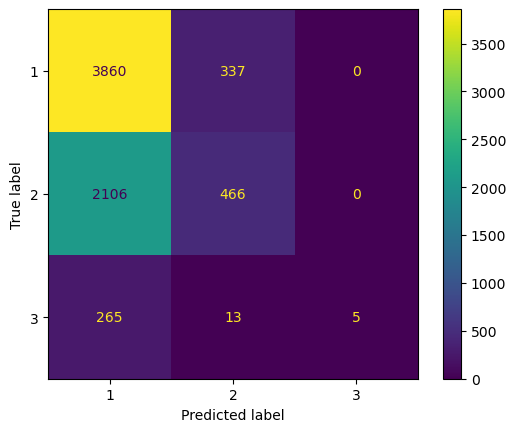

In [109]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  

In [110]:
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
#print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

RandomForestClassifier(n_jobs=-1, random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.63      0.92      0.75      8588
           2       0.59      0.20      0.30      5144
           3       0.71      0.02      0.04       585

    accuracy                           0.63     14317
   macro avg       0.64      0.38      0.36     14317
weighted avg       0.62      0.63      0.56     14317

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.62      0.92      0.74      4197
           2       0.57      0.18      0.28      2572
           3       1.00      0.02      0.03       283

    accuracy                           0.61      7052
   macro avg       0.73      0.37      0.35      7052
weighted avg       0.62      0.61      0.54      7052

Roc_auc score
-------------------------

In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [64]:
categorical_mask = (df.dtypes=='category')
categorical_columns = df.columns[categorical_mask].tolist()
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
oe_cols = [c for c in categorical_columns if data[c].nunique()>5]
ohe_cols = [c for c in categorical_columns if data[c].nunique()<=5]
len(oe_cols), len(ohe_cols), len(num_cols)

(3, 0, 0)

In [68]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

ohe_unique_list = [data[c].unique().tolist() for c in ohe_cols]
oe_unique_list = [data[c].unique().tolist() for c in oe_cols]
ohe = OneHotEncoder(categories=ohe_unique_list)
oe = OrdinalEncoder(categories=oe_unique_list)
imp = SimpleImputer(strategy='constant', fill_value=0)

In [80]:
from xgboost import XGBClassifier
#from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
#from transformers import pipeline

preprocess = make_column_transformer(
    (oe, oe_cols),
    (ohe, ohe_cols),
    (imp, num_cols),
    remainder='passthrough')

estimator = XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=2500, random_state=1234)
fs = SelectKBest(score_func=f_classif, k=20)
selector = RFE(estimator, n_features_to_select=20, step=1)
steps = [
    #('preprocess', preprocess),
    ('select', fs),
    ('clf', estimator)
]
pipeline = Pipeline(steps)

In [81]:
#pip install transformers

In [82]:
X_train

,subCategory_Apparel Set,subCategory_Bottomwear,subCategory_Dress,subCategory_Innerwear,subCategory_Loungewear and Nightwear,subCategory_Saree,subCategory_Socks,subCategory_Topwear,articleType_Baby Dolls,articleType_Bath Robe,...,articleType_Tshirts,articleType_Tunics,articleType_Waistcoat,usage_Casual,usage_Ethnic,usage_Formal,usage_Party,usage_Smart Casual,usage_Sports,usage_Travel
30773,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
37950,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
28806,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
11921,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41842,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23501,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25015,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
11107,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1910,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [89]:
y_train=y_train.to_frame()

In [90]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pred_df = pd.DataFrame({'y': y_test,'y_pred': y_pred})
gini = 2*roc_auc_score(y_test, y_pred)-1

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [57]:
X_train.shape[0]

14317

In [58]:
X_test.shape[0]

7052

In [56]:
# Some useful parameters which will come in handy later on
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_splits= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

TypeError: __init__() got multiple values for argument 'n_splits'

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [62]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
#installation
#pip install folium
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

In [5]:
world_map

In [2]:

#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['Country'],
                                   df.iloc[i]['User_Percent']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

NameError: name 'df' is not defined